# **Laboratório 01 - Expansão em Séries de Taylor**

Aluno:

**Exemplo 01** - Expansão da função $f(x) = e^x$, via Série de MacLaurin

$$
f(x) = e^x \approx \sum_{k=0}^{N}\frac{x^k}{k!}
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt

**Exemplo 02** - Implementar a função

\begin{equation}
     f(x) = sen(x) \approx \sum_{k=0}^{N} (-1)^k \frac{x^{2k+1}}{(2k+1)!}
\end{equation}

**Exemplo 03** : Use a expansão em Série de MacLaurin para mostrar que

\begin{equation}
e^{ix} = cos\,x + i\,sen\,x,\,\,\,\,\,\,i = \sqrt{-1}.
\end{equation}

# **Exercícios**

**01** - O valor de $\pi$ pode ser aproximado por meio da seguinte expansão em série:

\begin{equation}
\pi \approx 4 \sum_{i=1}^{n} (-1)^{i-1} \frac{1}{2i - 1}
\end{equation}

escreva uma função que retorne o valor aproximado de $\pi$ que receba como parâmetro de entrada os $n$ termos da série. Calcule o erro relativo para diferentes valores de $n$. Por exemplo: $n = 5,\,10,\,20,\,30.$



In [1]:
def pi(n):
    valor = 0
    for i in range (1,n+1):
        valor += pow(-1, (i-1)) / (2*i - 1) 
    
    
    return 4*valor

n = int(input("Digite o valor de N: "))

erro_relativo = (abs(pi(n)-pi(n-1)) / pi(n))*100

print(f"O valor de da Aproximaçao com {n}: {pi(n)} ")
print(f"O erro relativo em %: {erro_relativo}")

Digite o valor de N:  5


O valor de da Aproximaçao com 5: 3.3396825396825403 
O erro relativo em %: 13.307984790874528


**02** - Use a expansão em série de Taylor para mostrar que
\begin{equation}
    \frac{sen\,x}{x} \approx 1
\end{equation}
com um valor bem pequeno em $x.$



In [53]:
def seno(x,n):
    valor_aproximado = 0
    for k in range(n):
        valor_aproximado += ((-1)**k) * (pow(x,2*k+1)/mt.factorial(2*k+1))

    return valor_aproximado
    
x = 0.002
razao = seno(x,50)/x
print("Para um x bem pequeno, sen(x)/x é aproximadamente 1")
print(f"Valor da razão com x = {x}, razão = {razao}")

Para um x bem pequeno, sen(x)/x é aproximadamente 1
Valor da razão com x = 0.002, razão = 0.9999993333334666


**03** - Escreva a expansão em série de Taylor para $f(x) = e^{x^2}$ em torno da origem. Defina uma função $exp$\_$dupla(x,n),$ para calcular uma aproximação para $f(x)$ utilizando os $n$ primeiros termos da expansão. Adapte a função para receber como parâmetro de entrada um vetor.



In [6]:
def e_x2(x,n):
    valor = 0
    for k in range(n):
        valor += pow(x,2*k) / mt.factorial(k)

    return valor

#O vetor no paramentro será de valores de x ou um valor para n e outro para x?


54.15414462081129


**04** - Sabendo que o seno hiperbólico pode ser obtido por meio da seguinte expansão,
\begin{equation}
    senh\,x = \sum_{k=0}^{\infty} \frac{x^{2k+1}}{(2k+1)!}
\end{equation}
o cosseno hiperbólico por,
\begin{equation}
    cosh\,x = \sum_{k=0}^{\infty} \frac{x^{2k}}{(2k)!}
\end{equation}
e a tangente hiperbólica é dada por,
\begin{equation}
    tanh\,x = \frac{senh\,x}{cosh\,x}
\end{equation}
calcule a tangente hiperbólica de $x_0 = 0,5$ a partir das funções $ senh\,x$ e $ cosh\,x$, com um erro relatico de aproximadamente $10^{-5}.$ Gerar os gráficos e comparar com a função $np.tanh(x)$.

Valor calculado numericamente  0.4621171922898218
Valor calculador pela np.tanh(x) 0.46211715726000974


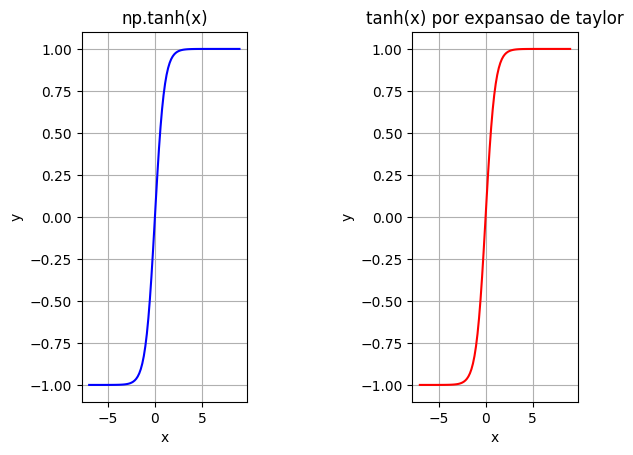

In [8]:
def senh(x,n):
    valor_aproximado = 0.0
    for k in range(n):
        valor_aproximado += float(pow(x,2*k+1) / mt.factorial(2*k+1))

    return valor_aproximado

def cosh(x,n):
    valor_aproximado = 0.0
    for k in range(n):
        valor_aproximado += float(pow(x,2*k) / mt.factorial(2*k))

    return valor_aproximado

def tangh(x):
    cont = 1
    x0 = 0
    valor_aprox = 0.0
    
    while True:

        valor_aprox = senh(x,cont) / cosh(x,cont)
        
        erro = abs((valor_aprox - x0)) 

        #Condição para que não haja divisão de um numero muito pequeno
        if cosh(x,cont) < 1e-10:
            break

        if erro < 10e-5:
            break
    
        cont +=1
        x0 = valor_aprox

    return valor_aprox

print("Valor calculado numericamente " , tangh(0.5))
print("Valor calculador pela np.tanh(x)", np.tanh(0.5))


x = np.linspace(-7,9,100)
valores_tangh = []
for i in x:
    valores_tangh.append(tangh(i))

plt.subplot(1,2,1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("np.tanh(x)")
y = np.tanh(x)
plt.plot(x,y,color="blue")
plt.grid()

plt.subplot(1,2,2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("tanh(x) por expansao de taylor")
plt.plot(x,valores_tangh, color="red")
plt.grid()
plt.subplots_adjust(wspace=1)

plt.show()